# Regression Problem: Diamond Price Prediction

## Load data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\sande\Downloads\diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

### EDA

In [4]:
# Missing values
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
data.duplicated().sum()

146

In [6]:
data = data.drop_duplicates()
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
data.describe(percentiles = [0.05, 0.10, 0.15, 0.2, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95])

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
5%,0.30000,59.300000,54.000000,544.000000,4.290000,4.300000,2.650000
10%,0.31000,60.000000,55.000000,646.000000,4.360000,4.360000,2.690000
15%,0.32000,60.500000,55.000000,737.000000,4.420000,4.430000,2.730000
20%,0.35000,60.800000,56.000000,837.000000,4.540000,4.550000,2.800000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000


In [10]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
import seaborn as sns

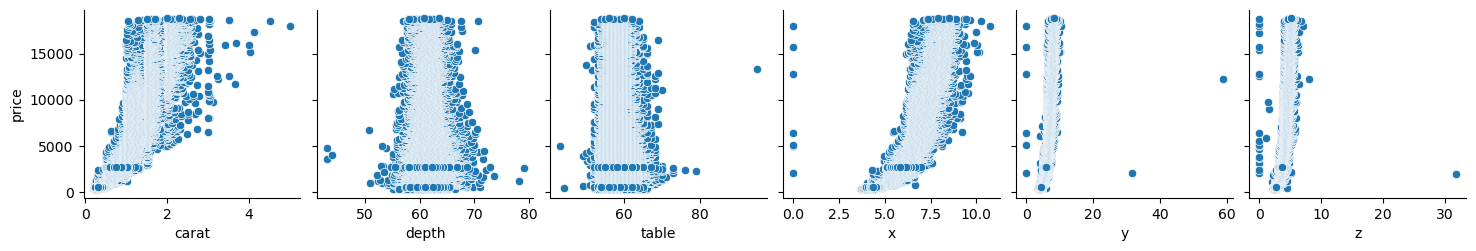

In [12]:
sns.pairplot(data = data, x_vars = ['carat', 'depth', 'table', 'x', 'y', 'z'], y_vars = ['price'])

<Axes: xlabel='price'>

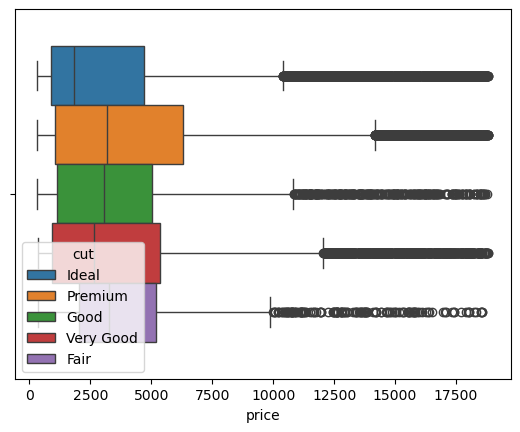

In [13]:
sns.boxplot(data = data, x = 'price', hue = 'cut')

<Axes: xlabel='price'>

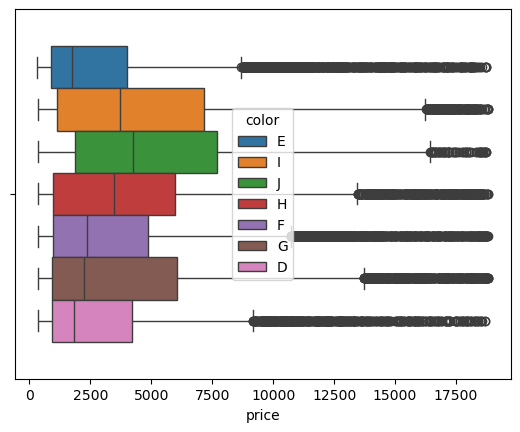

In [14]:
sns.boxplot(data = data, x = 'price', hue = 'color')

<Axes: ylabel='price'>

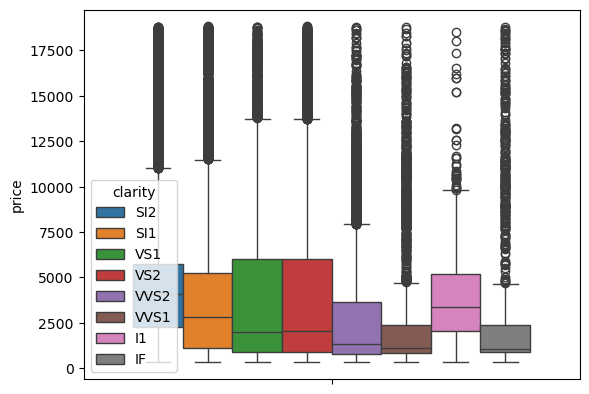

In [15]:
sns.boxplot(data = data, y = 'price', hue = 'clarity')

## Segregate the data into features and target

In [16]:
X = data.drop('price', axis = 1)
y = data['price']
X.shape, y.shape

((53794, 9), (53794,))

### Split the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43035, 9), (10759, 9), (43035,), (10759,))

## (Train) Data Preprocessing

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [22]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [23]:
# Ordinal Encoder
# Cut
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# Color
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
# Clarity
clarity_order = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
oe = OrdinalEncoder(categories = [cut_order, color_order, clarity_order])
oe

OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                           ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                           ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2',
                            'IF']])

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
# Robust Scaler
scaler = RobustScaler()
scaler

RobustScaler()

In [26]:
from sklearn.compose import ColumnTransformer

In [27]:
ct = ColumnTransformer(
    [('ORDINAL', oe, ['cut', 'color', 'clarity']),
     ('SCALE', scaler, ['carat', 'depth', 'table', 'x', 'y', 'z'])],
    remainder = 'passthrough',
    verbose_feature_names_out = False
).set_output(transform = 'pandas')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ORDINAL',
                                 OrdinalEncoder(categories=[['Fair', 'Good',
                                                             'Very Good',
                                                             'Premium',
                                                             'Ideal'],
                                                            ['D', 'E', 'F', 'G',
                                                             'H', 'I', 'J'],
                                                            ['I1', 'SI1', 'SI2',
                                                             'VS1', 'VS2',
                                                             'VVS1', 'VVS2',
                                                             'IF']]),
                                 ['cut', 'color', 'clarity']),
                                ('SCALE', RobustScaler(),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z'])],
                  verbose_feature_names_out=False)

In [28]:
X_train_transformed = ct.fit_transform(X_train)
X_train_transformed.head()

,cut,color,clarity,carat,depth,table,x,y,z
33544,4.0,0.0,4.0,-0.546875,0.133333,-0.666667,-0.666667,-0.648352,-0.646018
26752,4.0,0.0,2.0,2.359375,0.133333,0.000000,1.459016,1.428571,1.469027
45914,4.0,1.0,4.0,-0.265625,-1.200000,0.000000,-0.245902,-0.225275,-0.318584
3071,3.0,0.0,1.0,0.156250,-0.066667,0.333333,0.147541,0.120879,0.132743
43829,4.0,1.0,5.0,-0.453125,-0.200000,-0.333333,-0.480874,-0.489011,-0.495575


In [29]:
X_train_transformed.min()

cut         0.000000
color       0.000000
clarity     0.000000
carat      -0.781250
depth     -12.533333
table      -4.666667
x          -3.109290
y          -3.137363
z          -3.115044
dtype: float64

In [30]:
X_train_transformed.max()

cut         4.000000
color       6.000000
clarity     7.000000
carat       6.734375
depth      11.466667
table      12.666667
x           2.759563
y          29.225275
z           4.017699
dtype: float64

## Model Building

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [33]:
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [34]:
knn.score(X_train_transformed, y_train)

0.9744445939450368

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [37]:
dt.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [38]:
dt.score(X_train_transformed, y_train)

0.9999972338407894

### (Test) Data Preprocessing

In [39]:
X_test_transformed = ct.transform(X_test)
X_test_transformed.head()

,cut,color,clarity,carat,depth,table,x,y,z
43657,0.0,6.0,4.0,0.015625,2.066667,-1.000000,-0.032787,-0.098901,0.088496
4274,2.0,1.0,2.0,0.312500,-0.533333,0.666667,0.245902,0.258242,0.212389
47412,4.0,3.0,3.0,-0.203125,0.200000,-0.333333,-0.213115,-0.208791,-0.194690
44437,3.0,1.0,4.0,-0.296875,0.466667,1.000000,-0.333333,-0.335165,-0.300885
13975,4.0,5.0,1.0,0.765625,0.333333,-0.666667,0.606557,0.609890,0.637168


## Performance Evaluation

In [40]:
y_pred = dt.predict(X_test_transformed)
y_pred

array([ 1774.,  3619.,  1822., ...,   867., 12156.,  1044.])

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_pred, y_test)

0.9675403080670374

In [43]:
y_pred1 = knn.predict(X_test_transformed)
r2_score(y_pred1, y_test)

0.9563725512907589